In [46]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [47]:
font_path = '/System/Library/AssetsV2/com_apple_MobileAsset_Font7/bad9b4bf17cf1669dde54184ba4431c22dcad27b.asset/AssetData/NanumGothic.ttc'
fontprop = fm.FontProperties(fname = font_path, size = 10)

# 데이터 로드 및 확인

In [69]:
train = pd.read_csv('EV_Cost_data/train.csv')
test = pd.read_csv('EV_Cost_data/test.csv')
sample = pd.read_csv('EV_Cost_data/sample_submission.csv')

In [49]:
train.head(1)

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
0,TRAIN_0000,P사,TayGTS,Nearly New,86.077,AWD,13642,0,No,2,159.66


In [50]:
print(test.isna().sum())

test.head(1)

ID            0
제조사           0
모델            0
차량상태          0
배터리용량       304
구동방식          0
주행거리(km)      0
보증기간(년)       0
사고이력          0
연식(년)         0
dtype: int64


,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년)
0,TEST_000,P사,TayCT,Nearly New,76.093,AWD,14057,2,No,0


In [51]:
from test_preprocessing import main
test_preprocessor = main
pre_test = test_preprocessor(test)
pre_test.head(1)

,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),연간_주행거리,제조사_카테고리
0,4,15,1,76.093,0,14057,2,0,0,14057.0,3


In [52]:
from preprocessor import main
preprocessor = main
pre_train = preprocessor(train)
pre_train.head(1)

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원),연간_주행거리,가격구간,제조사_카테고리
0,0,4,16,1,86.077,0,13642,0,0,2,159.66,4547.333333,0,3


**변수 별 개인 생각**
- ID, 모델 : "모델"은 가격에 영향을 줄 것 같지만 과적합 문제가 있을 수 있으니 일반화 성능을 구현하는 데에는 drop이 더 편할 듯
- 제조사에 따라서 가격이 나누어 질 것으로 예상됨 (브랜드 별로 가격 차이가 많이 나니까)
- 주행거리, 사고이력, 연식 등이 중고차 가격에 많은 영향을 미칠 것 같음

In [53]:
test.head(1)

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),연간_주행거리
0,0,4,15,1,76.093,0,14057,2,0,0,14057.0


In [54]:
sample.head(1)

,ID,가격(백만원)
0,TEST_000,0


In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7497 entries, 0 to 7496
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        7497 non-null   object 
 1   제조사       7497 non-null   object 
 2   모델        7497 non-null   object 
 3   차량상태      7497 non-null   object 
 4   배터리용량     4786 non-null   float64
 5   구동방식      7497 non-null   object 
 6   주행거리(km)  7497 non-null   int64  
 7   보증기간(년)   7497 non-null   int64  
 8   사고이력      7497 non-null   object 
 9   연식(년)     7497 non-null   int64  
 10  가격(백만원)   7497 non-null   float64
 11  연간_주행거리   7497 non-null   float64
 12  가격구간      7497 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 761.5+ KB


In [61]:
train.isnull().sum()

ID             0
제조사            0
모델             0
차량상태           0
배터리용량       2711
구동방식           0
주행거리(km)       0
보증기간(년)        0
사고이력           0
연식(년)          0
가격(백만원)        0
연간_주행거리        0
가격구간           0
dtype: int64

In [74]:
pre_train[pre_train['제조사'] == 4]

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원),연간_주행거리,가격구간,제조사_카테고리
0,0,4,16,1,86.077,0,13642,0,0,2,159.66,4547.333333,0,3
16,16,4,15,1,76.093,0,49335,2,0,0,130.61,49335.000000,0,3
31,31,4,16,2,64.683,0,97476,2,0,0,151.00,97476.000000,0,3
32,32,4,15,0,90.000,0,1292,2,0,0,120.08,1292.000000,0,3
56,56,4,16,0,92.516,0,9161,2,0,0,160.73,9161.000000,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7448,7448,4,16,2,70.185,0,184495,2,0,0,156.47,184495.000000,0,3
7465,7465,4,14,0,90.000,0,2765,2,0,0,104.25,2765.000000,0,3
7469,7469,4,15,1,76.093,0,17891,0,0,2,119.83,5963.666667,0,3
7479,7479,4,16,2,70.185,0,78364,2,0,0,155.80,78364.000000,0,3


In [ ]:
for n in train['제조사'].unique():
    print(f"{n}의 모델들 :", train[train['제조사'] == n]['모델'].unique())
# P : 포르쉐
# K : 기아
# A : 아우디
# B : 비엠
# H : 현대
# T : 테슬라
# V : 폭스바겐

P사의 모델들 : ['TayGTS' 'TayCT' 'Tay']
K사의 모델들 : ['Niro' 'Soul' 'EV6']
A사의 모델들 : ['eT' 'RSeTGT' 'Q4eT']
B사의 모델들 : ['i5' 'iX' 'i3']
H사의 모델들 : ['ION6' 'IONIQ' 'KNE' 'ION5']
T사의 모델들 : ['MS' 'MY' 'MX' 'M3']
V사의 모델들 : ['ID4']


In [57]:
train[train['배터리용량'].isna()]['모델'].unique()

array(['RSeTGT', 'MS', 'MY', 'Q4eT', 'ID4', 'Niro', 'ION6', 'iX', 'MX',
       'TayCT', 'EV6', 'i5', 'KNE', 'M3', 'TayGTS', 'i3', 'ION5', 'Tay',
       'Soul', 'IONIQ', 'eT'], dtype=object)

In [62]:
# 널값이 있는 모델 목록 가져오기
models_with_nan = train[train['배터리용량'].isna()]['모델'].unique()

# 각 모델별로 널값을 평균으로 채우기
for model in models_with_nan:
    mean_battery = train[train['모델'] == model]['배터리용량'].mean()
    train.loc[(train['모델'] == model) & (train['배터리용량'].isna()), '배터리용량'] = mean_battery

In [63]:
train[train['모델'] == 'Niro']['배터리용량'].mean()

54.57893333333333

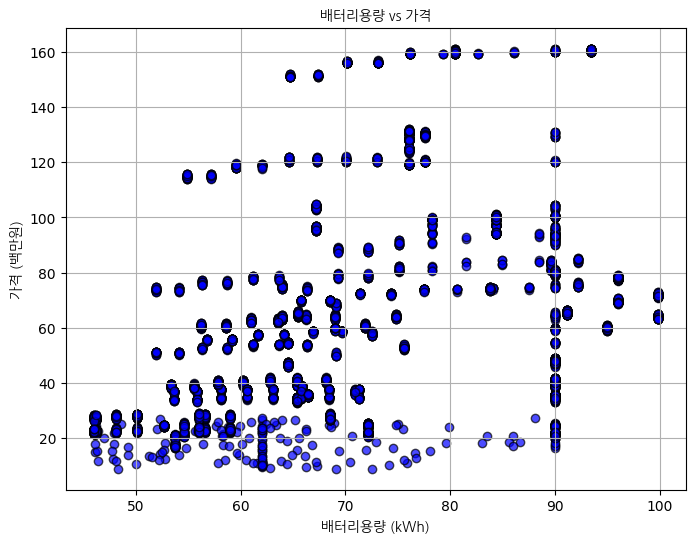

In [64]:
plt.figure(figsize=(8, 6))
plt.scatter(train['배터리용량'], train['가격(백만원)'], color='blue', edgecolor='k', alpha=0.7)
plt.title('배터리용량 vs 가격', fontproperties = fontprop)
plt.xlabel('배터리용량 (kWh)', fontproperties = fontprop)
plt.ylabel('가격 (백만원)', fontproperties = fontprop)
plt.grid(True)
plt.show()

**배터리 용량 Column에 2711개의 널데이터 존재**   
->널 데이터는 배터리가 없는 pure 연료 차 인가? 하지만 EV인데?

# 데이터 EDA

## train data eda

In [41]:
train['연식(년)'].value_counts()

연식(년)
0    6395
2     566
1     536
Name: count, dtype: int64

In [42]:
train['보증기간(년)'].value_counts()

보증기간(년)
2     1358
7     1093
8     1073
0      618
1      552
10     522
9      515
3      494
5      428
4      426
6      418
Name: count, dtype: int64

**0년식? 신차?가 너무 많다** -> 카테고리화가 되어 있음

In [43]:
train['배터리용량'].value_counts()

배터리용량
90.000    559
56.000    327
46.000    223
68.488    202
76.093    186
         ... 
59.920      1
62.100      1
65.210      1
58.260      1
67.170      1
Name: count, Length: 194, dtype: int64

In [44]:
train['모델'].value_counts()

모델
ID4       605
i5        414
Niro      398
Soul      397
i3        388
RSeTGT    385
eT        379
ION6      379
Q4eT      378
TayGTS    375
EV6       369
iX        367
KNE       365
Tay       361
ION5      353
TayCT     335
MY        289
M3        279
MS        277
MX        264
IONIQ     140
Name: count, dtype: int64

In [45]:
train.describe()

,배터리용량,주행거리(km),보증기간(년),연식(년),가격(백만원)
count,4786.000000,7497.000000,7497.000000,7497.000000,7497.000000
mean,69.397187,44287.979458,4.960918,0.222489,62.331949
std,15.283635,55204.064386,3.155342,0.569232,36.646759
min,46.000000,3.000000,0.000000,0.000000,9.000000
25%,56.359000,5465.000000,2.000000,0.000000,34.390000
50%,68.125000,17331.000000,5.000000,0.000000,56.000000
75%,78.227000,61252.000000,8.000000,0.000000,80.050000
max,99.800000,199827.000000,10.000000,2.000000,161.090000


In [10]:
train['차량상태'].unique()

array(['Nearly New', 'Brand New', 'Pre-Owned'], dtype=object)

In [20]:
for status in train['차량상태'].unique():
    des = train[train['차량상태'] == status]['주행거리(km)'].describe()
    print(f"{status}의 describe :")
    print(f"{des}")

Nearly New의 describe :
count     2059.000000
mean     30602.352113
std      12257.976737
min      10004.000000
25%      20499.000000
50%      30453.000000
75%      40270.000000
max      79226.000000
Name: 주행거리(km), dtype: float64
Brand New의 describe :
count    3380.000000
mean     4935.953550
std      2897.745303
min         3.000000
25%      2372.750000
50%      4980.000000
75%      7440.750000
max      9999.000000
Name: 주행거리(km), dtype: float64
Pre-Owned의 describe :
count      2058.000000
mean     122610.892128
std       45517.411096
min       11477.000000
25%       82717.000000
50%      123352.500000
75%      161763.500000
max      199827.000000
Name: 주행거리(km), dtype: float64


In [24]:
print(train['구동방식'].unique())
print(train['구동방식'].value_counts())

['AWD' 'FWD' 'RWD']
구동방식
AWD    5167
FWD    1267
RWD    1063
Name: count, dtype: int64


In [25]:
print(train['사고이력'].unique())
print(train['사고이력'].value_counts())

['No' 'Yes']
사고이력
No     7154
Yes     343
Name: count, dtype: int64


In [ ]:
from target_preprocessing import categorize_by_quantiles, categorize_by_mean_std, categorize_by_kmeans, categorize_by_gmm

# 평균을 기준으로 고가 저가 등을 나눔

train['가격구간'] = categorize_by_mean_std(train, column="가격(백만원)")
train.head()

Mean: 62.331948779511805, Std: 36.64675928062657
Boundaries: Low <= 25.685189498885237, Mid = (25.685189498885237, 98.97870806013837], High > 98.97870806013837


,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원),가격(백만원)_log,가격구간
0,TRAIN_0000,P사,TayGTS,Nearly New,86.077,AWD,13642,0,No,2,159.66,5.079290,고가
1,TRAIN_0001,K사,Niro,Nearly New,56.000,FWD,10199,6,No,0,28.01,3.367641,중가
2,TRAIN_0002,A사,eT,Brand New,91.200,AWD,2361,7,No,0,66.27,4.208714,중가
3,TRAIN_0003,A사,RSeTGT,Nearly New,NaN,AWD,21683,3,No,0,99.16,4.606769,고가
4,TRAIN_0004,B사,i5,Pre-Owned,61.018,AWD,178205,1,No,0,62.02,4.143452,중가


In [59]:
train[train['제조사'] == 'P사']['가격구간'].value_counts()

가격구간
고가    984
중가     87
Name: count, dtype: int64

In [27]:
print("배터리 용량 널 데이터 수 : ", len(train[train['배터리용량'].isna()]))
train[train['배터리용량'].isna()]

배터리 용량 널 데이터 수 :  2711


,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
3,TRAIN_0003,A사,RSeTGT,Nearly New,NaN,AWD,21683,3,No,0,99.16
6,TRAIN_0006,T사,MS,Nearly New,NaN,AWD,19395,3,No,0,83.42
8,TRAIN_0008,T사,MY,Brand New,NaN,AWD,2226,8,No,0,74.06
9,TRAIN_0009,A사,Q4eT,Brand New,NaN,AWD,3683,7,No,0,59.66
11,TRAIN_0011,V사,ID4,Brand New,NaN,AWD,1131,8,No,0,40.50
...,...,...,...,...,...,...,...,...,...,...,...
7489,TRAIN_7489,H사,ION5,Brand New,NaN,AWD,8871,9,No,0,35.83
7490,TRAIN_7490,A사,Q4eT,Brand New,NaN,AWD,5794,7,No,0,59.95
7491,TRAIN_7491,K사,Soul,Brand New,NaN,FWD,5966,10,No,0,16.75
7492,TRAIN_7492,H사,ION5,Brand New,NaN,AWD,3773,10,No,0,35.95


In [70]:
train['제조사'].unique()

array(['P사', 'K사', 'A사', 'B사', 'H사', 'T사', 'V사'], dtype=object)

# 전처리 후 데이터 EDA